In [1]:
import numpy as np
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
from numpy import mean
from numpy import std
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from BaselineRemoval import BaselineRemoval
from sklearn.model_selection import KFold, RepeatedStratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.utils.fixes import loguniform
from sklearn.metrics import classification_report, plot_confusion_matrix


plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directoryimport matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_name = 'veinData' 

In [3]:
earData = pd.read_csv(f'matlab_3/{file_name}.csv', header=None)

In [4]:
earData

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,-0.956749,-1.029626,-1.017856,-0.855469,-0.639826,-0.500560,-0.415343,-0.378334,-0.457081,-0.649137,...,-0.248627,-0.348698,-0.514044,-0.735165,-0.896960,-1.008467,-0.929894,-0.709697,-0.313050,-0.015326
1,0.188602,0.612515,0.962024,1.020043,0.804257,0.578474,0.358434,0.114636,-0.018890,-0.064267,...,0.183131,0.098678,0.078017,0.110249,0.168385,0.249990,0.225486,0.135622,0.038505,-0.011125
2,-0.427744,-0.843577,-0.973749,-1.094837,-1.099304,-1.145395,-1.312647,-1.439863,-1.539529,-1.619051,...,-0.713293,-0.782311,-0.900822,-0.972022,-0.942396,-0.801063,-0.819186,-0.935737,-1.133442,-1.531793
3,-0.059010,-0.283559,-0.617396,-0.746140,-0.725787,-0.723262,-0.749124,-0.750820,-0.836751,-0.968919,...,-0.932143,-0.855030,-0.730540,-0.550952,-0.395077,-0.271985,-0.208204,-0.220917,-0.294292,-0.356683
4,-0.775779,-1.187947,-1.260775,-1.314226,-1.254639,-1.179911,-1.169019,-1.131497,-1.078496,-1.066826,...,-0.989937,-0.981002,-1.029902,-0.840142,-0.694424,-0.727834,-0.718872,-0.703802,-0.950125,-0.785383
5,1.524347,0.854096,0.164614,-0.032100,0.309243,0.491366,0.534077,0.652821,0.625662,0.446517,...,1.118747,1.088505,0.985657,1.140339,1.233925,1.149535,1.185555,1.257255,1.074454,1.241685
6,0.050777,-0.171107,0.119042,0.067834,-0.042286,-0.101835,-0.213230,-0.340445,-0.327611,-0.298826,...,-1.022499,-0.962342,-0.819178,-0.684797,-0.574307,-0.486582,-0.467729,-0.505402,-0.509363,-0.650937
7,-0.746695,-0.804544,-0.992677,-1.058343,-1.106845,-1.092383,-1.030685,-0.915189,-0.806541,-0.693858,...,-0.883415,-0.863489,-0.764655,-0.707289,-0.685177,-0.696428,-0.624802,-0.527069,-0.402192,-0.097649
8,-0.453881,-0.403078,-0.344900,-0.286526,-0.265171,-0.198766,-0.085586,-0.012564,0.016297,0.063071,...,0.080263,0.062983,0.016987,-0.180999,-0.314433,-0.298117,-0.244561,-0.188232,0.002910,-0.080947
9,-1.192059,-1.548752,-1.580065,-1.418348,-1.090557,-0.891197,-0.831102,-0.789884,-0.847286,-0.955642,...,-1.020271,-1.076819,-1.105487,-1.011297,-0.887424,-0.780416,-0.674583,-0.612400,-0.597644,-0.685786


In [5]:
earData = earData.to_numpy()

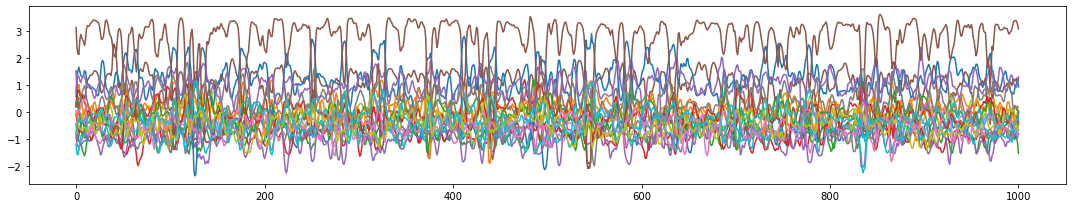

In [6]:
plt.figure(figsize=(15,3))
for observation in earData:
    plt.plot(observation, label=f'Observation {observation[0]}')
plt.show()

In [7]:
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import plot_roc_curve

In [8]:
n_components = .99
pca = PCA(n_components=n_components)

In [9]:
pca.fit(earData)
print('Number of components : ', pca.n_components_)
print('Explained variance ratio : ', pca.explained_variance_ratio_)

Number of components :  16
Explained variance ratio :  [0.81158974 0.08640574 0.01867367 0.0102402  0.00920923 0.00828059
 0.0069933  0.00634301 0.00598072 0.00575053 0.0048733  0.00422575
 0.00394889 0.00387336 0.00356081 0.00330849]


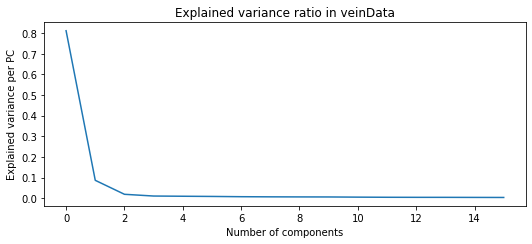

In [10]:
plt.plot(pca.explained_variance_ratio_)
plt.title(f'Explained variance ratio in {file_name}')
plt.xlabel('Number of components')
plt.ylabel('Explained variance per PC')
plt.savefig(f'exp_variance/{file_name}.pdf')
plt.show()

In [11]:
X_pca = pca.fit_transform(earData)

In [12]:
X_pca

array([[-2.00928769e+01, -2.56627787e+00,  1.51805848e+00,
         9.53259176e-01,  3.41768084e+00,  6.12810280e-02,
        -5.68913833e-01, -9.68749064e-01,  5.59282651e+00,
         1.15176388e+00,  2.67819916e+00,  2.50113608e+00,
        -2.84980439e-01, -3.15535934e+00,  1.08547610e+00,
         3.72694413e+00],
       [ 5.23959418e+00,  7.26480343e+00, -4.60264444e-04,
         3.67202805e+00, -8.59717626e-01,  3.50940615e+00,
        -3.63953124e+00, -1.89759970e+00,  2.84190134e-01,
        -3.23835553e+00,  1.41926122e+00,  2.77722132e+00,
        -1.82303401e+00,  2.27346857e+00,  1.61325000e+00,
        -8.51690971e-01],
       [-2.53384619e+01, -5.44686099e+00,  3.63831334e+00,
        -2.25190471e-02,  2.52733638e-01,  4.59961001e+00,
        -1.62229757e+00, -5.45667803e-01,  2.23318250e-01,
        -1.72169412e-01,  2.51171784e+00, -2.37591650e+00,
         5.62626480e+00,  2.32407148e+00,  6.95227191e-01,
        -6.52487121e-01],
       [-2.59113177e+01, -4.98844647e

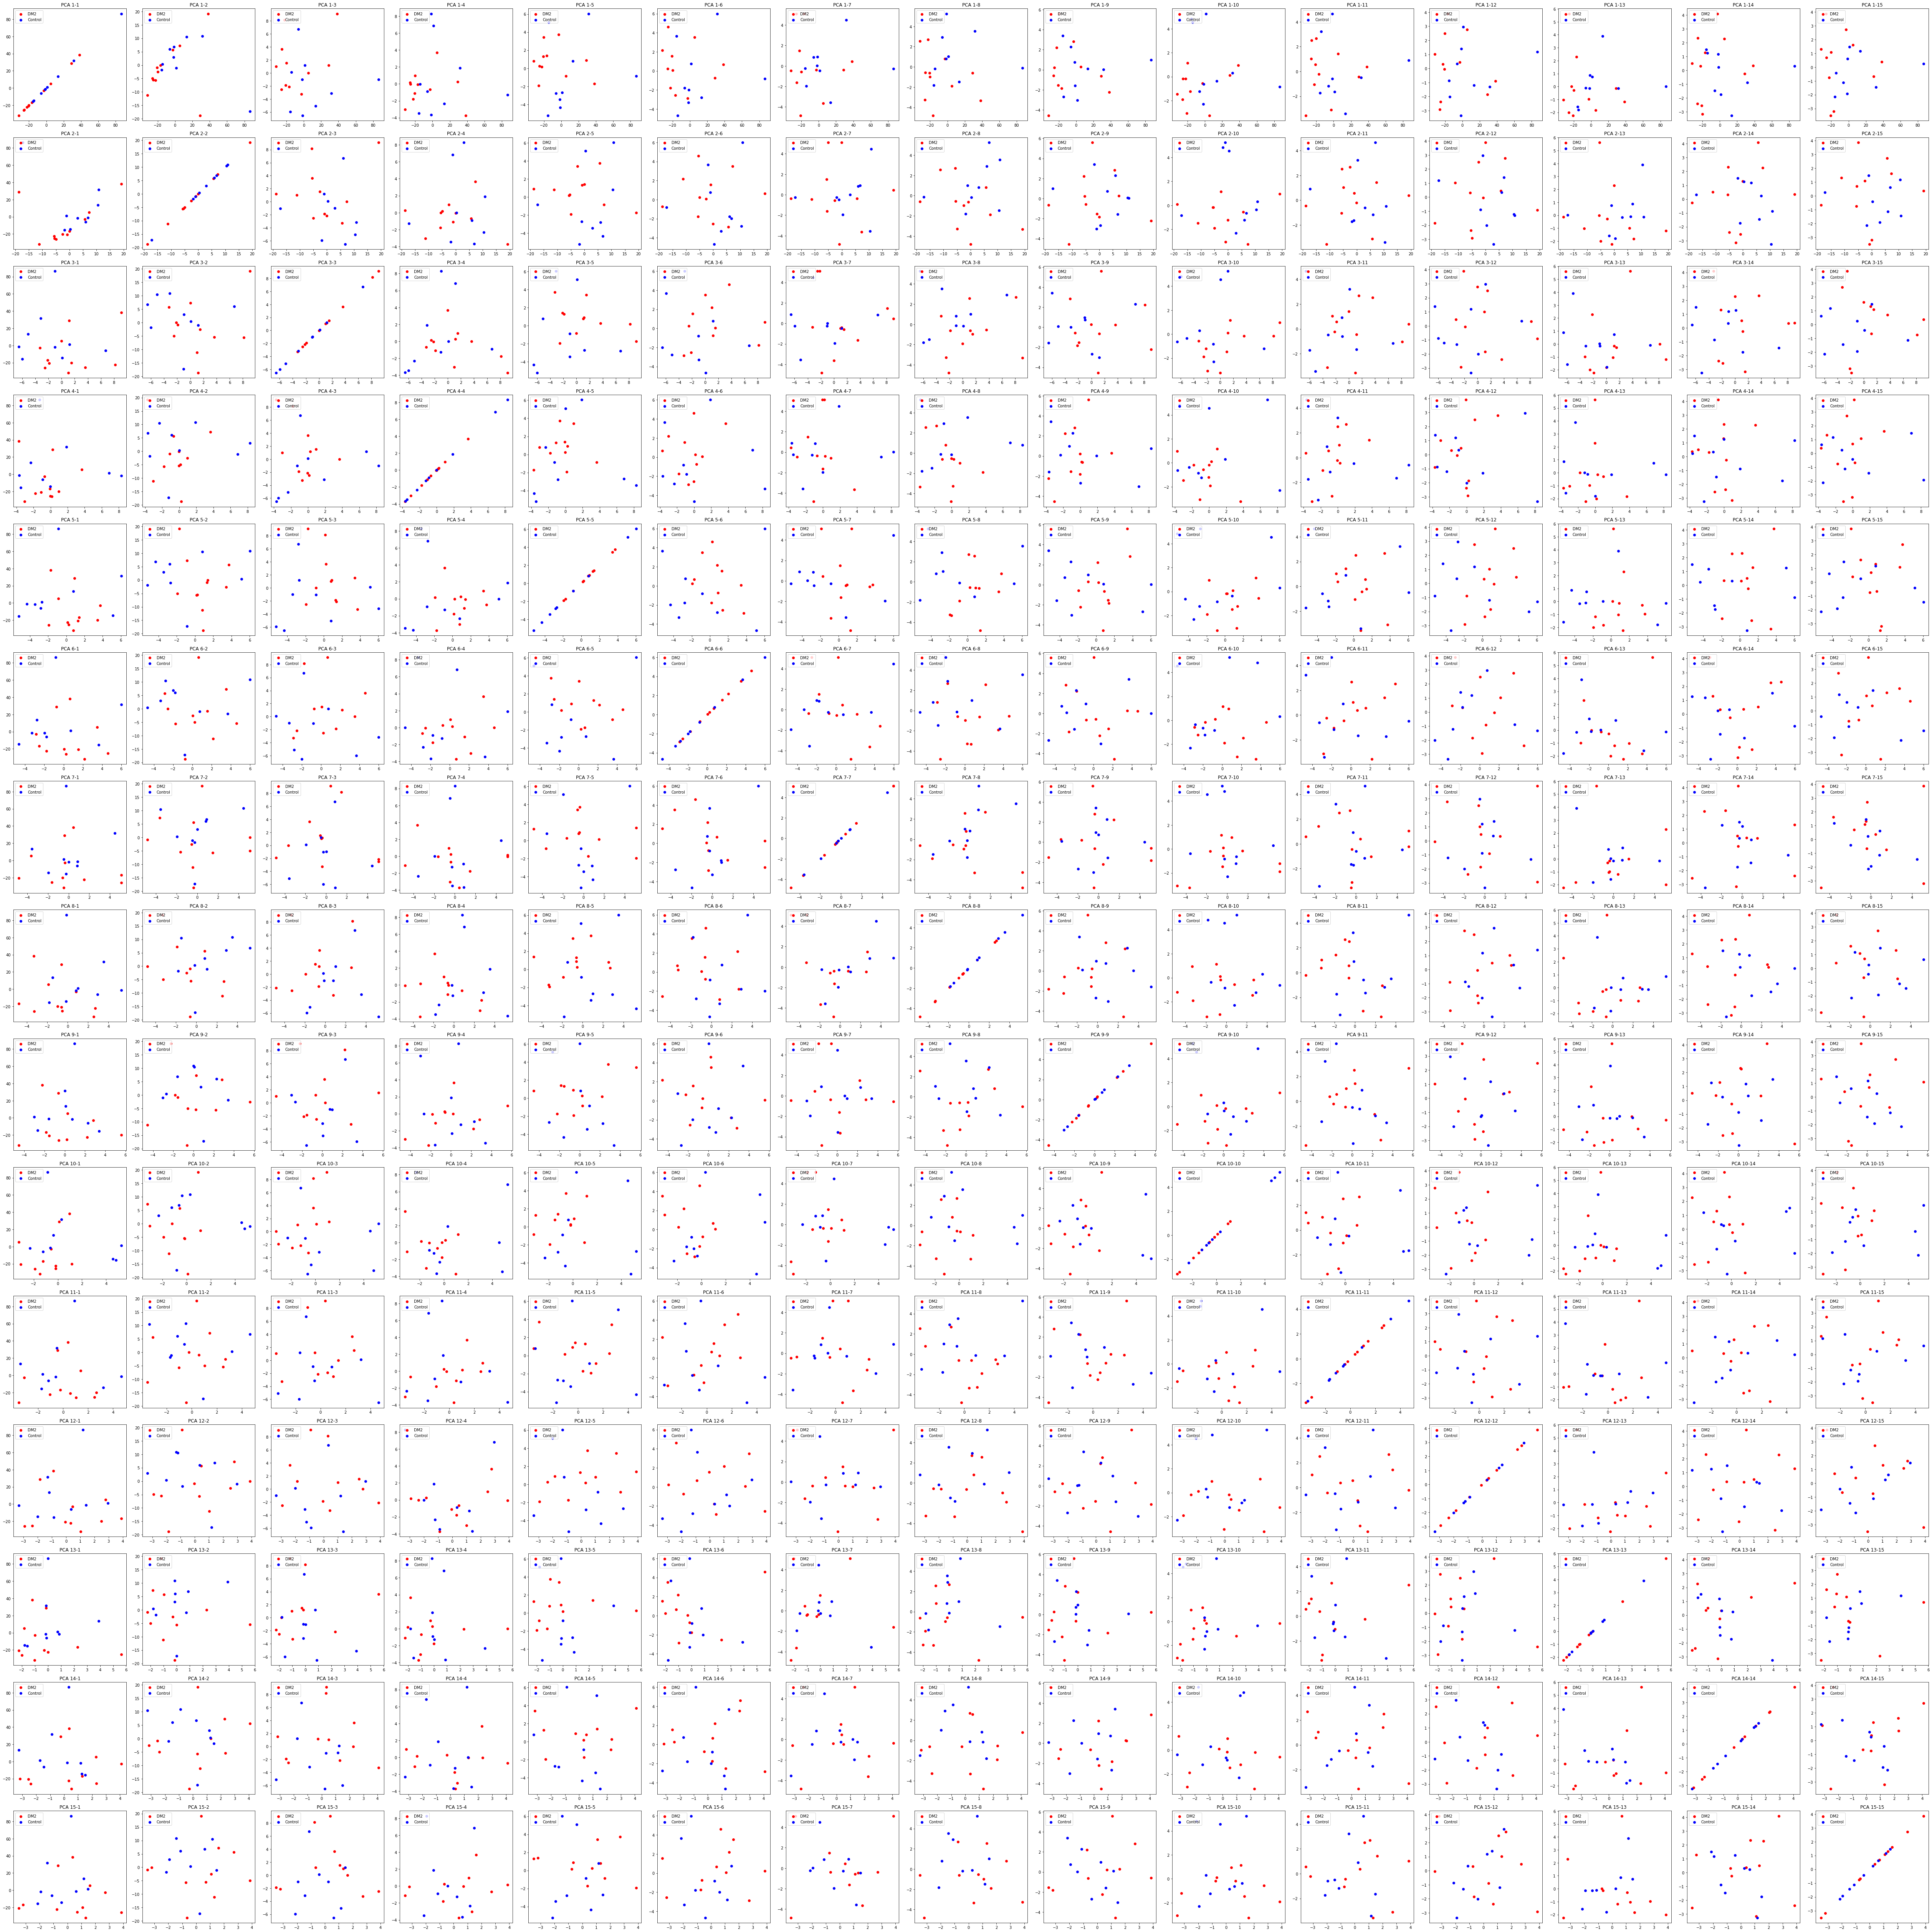

In [219]:
i = 0

fig, axs = plt.subplots(pca.n_components_ - 1, pca.n_components_ - 1, figsize=(70, 70))
for i in range(pca.n_components_ - 1):
    for j in range(pca.n_components_ - 1):
        axs[i, j].scatter(X_pca[:, i][:11], X_pca[:, j][:11], c='red')
        axs[i, j].scatter(X_pca[:, i][11:], X_pca[:, j][11:], c='blue')
        axs[i, j].set_title('PCA ' + str(i+1) + '-' + str(j+1))
        
        axs[i, j].legend(['DM2', 'Control'], loc="upper left")
        

        # axs[i, j].xlabel(f'PC{i + 1}')
        # axs[i, j].ylabel(f'PC{j + 1}')

# plt.title(f'PCA with n_components = {pca.n_components_}')
# plt.savefig(f'plot/pca/{file_name}.pdf', bbox_inches='tight')
plt.show()

<StemContainer object of 3 artists>

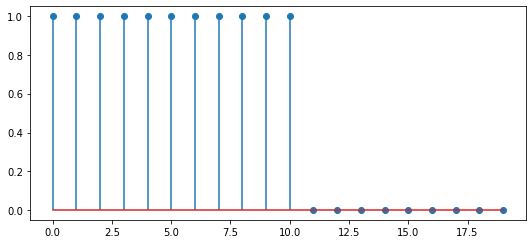

In [13]:
target = pd.read_csv('matlab_raman_preprocessed copy/earData.csv')['has_DM2']
target = np.array([int(x) for x in target])
plt.stem(target)

In [14]:
from sklearn.model_selection import KFold, StratifiedKFold

In [15]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [16]:
# for train, test in kf.split(X_pca):
#     print("%s %s" % (train, test))

Train Index:  [ 0  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19] 

Test Index:  [1 5]
Train Index:  [ 0  1  2  3  5  6  7  8  9 10 12 13 14 15 16 17 18 19] 

Test Index:  [ 4 11]
Train Index:  [ 0  1  2  3  4  5  6  7  8 10 11 12 13 15 16 17 18 19] 

Test Index:  [ 9 14]
Train Index:  [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 17 18 19] 

Test Index:  [ 7 16]
Train Index:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19] 

Test Index:  [ 0 17]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 19] 

Test Index:  [10 18]
Train Index:  [ 0  1  2  3  4  5  6  7  9 10 11 13 14 15 16 17 18 19] 

Test Index:  [ 8 12]
Train Index:  [ 0  1  2  3  4  5  7  8  9 10 11 12 14 15 16 17 18 19] 

Test Index:  [ 6 13]
Train Index:  [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] 

Test Index:  [ 2 19]
Train Index:  [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19] 

Test Index:  [ 3 15]


<Figure size 1080x360 with 0 Axes>

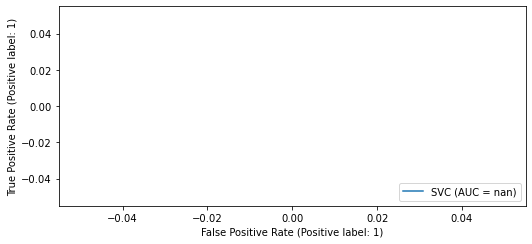

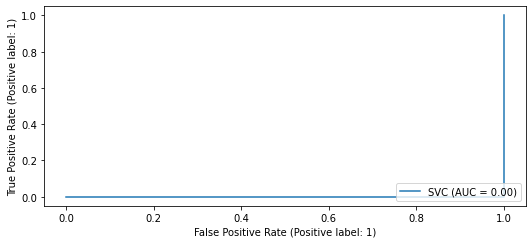

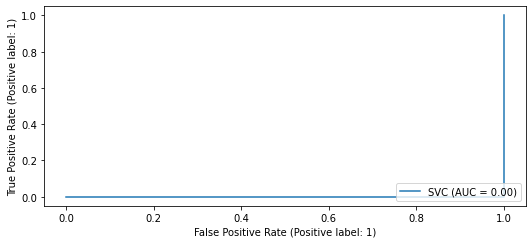

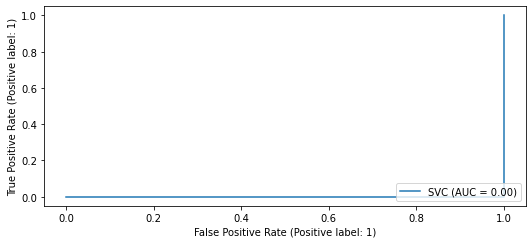

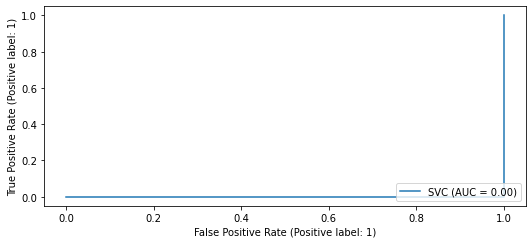

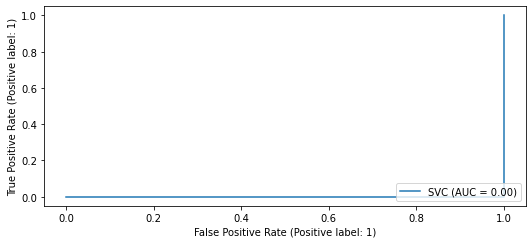

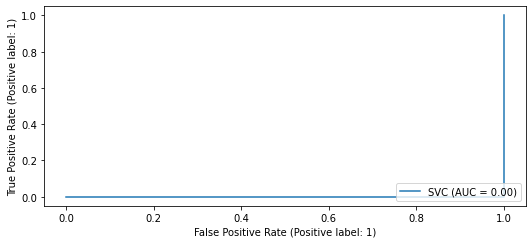

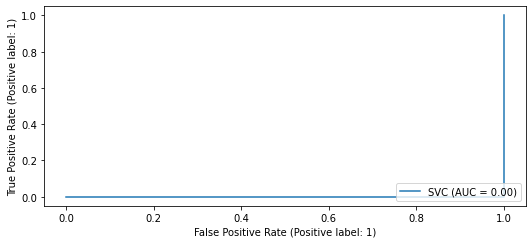

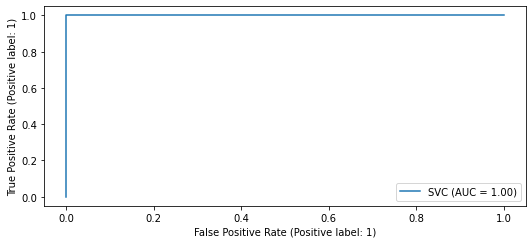

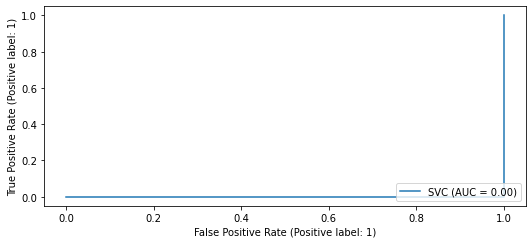

In [17]:
scores = []
best_svc = SVC(kernel='linear', probability=True, C=0.001, gamma=1)
plt.figure(figsize=(15, 5))
for train_index, test_index in kf.split(X_pca, target):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X_pca[train_index], X_pca[test_index], target[train_index], target[test_index]
    best_svc.fit(X_train, y_train)
    RocCurveDisplay.from_estimator(best_svc, X_test, y_test)
    scores.append(best_svc.score(X_test, y_test))

In [18]:
print(scores)
print('Mean accuracy:', mean(scores))

[0.0, 0.5, 1.0, 0.5, 1.0, 0.0, 0.5, 0.5, 0.5, 1.0]
Mean accuracy: 0.55


In [19]:
best_svc.predict_proba(X_pca)

array([[0.45498548, 0.54501452],
       [0.4426271 , 0.5573729 ],
       [0.45777881, 0.54222119],
       [0.45521869, 0.54478131],
       [0.46133551, 0.53866449],
       [0.44630377, 0.55369623],
       [0.45315408, 0.54684592],
       [0.45196175, 0.54803825],
       [0.44378033, 0.55621967],
       [0.45777881, 0.54222119],
       [0.42891966, 0.57108034],
       [0.44298968, 0.55701032],
       [0.44197025, 0.55802975],
       [0.4381212 , 0.5618788 ],
       [0.42917625, 0.57082375],
       [0.42775216, 0.57224784],
       [0.4495286 , 0.5504714 ],
       [0.43457986, 0.56542014],
       [0.447882  , 0.552118  ],
       [0.44579346, 0.55420654]])

In [20]:
best_svc.support_vectors_

array([[ 1.20095719e+00, -1.04463938e+00,  1.19127884e+00,
         6.84259853e+00, -2.70099620e+00,  7.55806709e-01,
        -4.70906944e-01,  1.02084085e+00, -3.02858299e+00,
         5.25232713e+00, -1.64427355e+00,  2.96322882e+00,
         7.51439318e-01, -1.74154012e+00,  1.47073950e+00,
        -1.74008257e+00],
       [-1.70843568e+00,  2.99234830e+00, -9.88597633e-01,
         8.28510406e+00, -3.43735248e+00, -3.30300279e+00,
         1.63370683e-02,  8.13893460e-01,  7.36052702e-01,
        -2.30171314e+00, -5.96903189e-01, -3.34520924e+00,
        -1.53010406e-01,  1.17834194e+00, -1.93132182e+00,
         2.84939933e+00],
       [-1.32243920e+00,  6.80719158e+00, -6.53151552e+00,
        -3.67308139e+00, -4.33480803e+00, -1.98973245e+00,
         8.89082147e-01,  5.25720967e+00, -1.57587126e+00,
        -6.29755187e-01,  4.65668012e+00,  1.39893711e+00,
         8.71342625e-01,  2.31164957e-01,  6.17520068e-01,
         5.66908708e-01],
       [ 3.16162957e+01,  1.08500139e

In [21]:
roc_auc_score(target, best_svc.predict_proba(X_pca)[:, 0])

# roc_auc_score(target, best_svc.decision_function(X_pca))

0.8282828282828283

In [22]:
# Run classifier with cross-validation and plot ROC curves
cv = RepeatedStratifiedKFold(n_splits=10, random_state=42)
classifier = grid.best_estimator_

tprs = []
aucs = []
acc = []
mean_fpr = np.linspace(0, 1, 100)

X = X_pca
y = target

fig, ax = plt.subplots(figsize=(15,10))
for i, (train, test) in enumerate(cv.split(X, y)):
    print(f'FOLD {i+1} Test set')
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    acc.append(classifier.score(X[test], y[test]))
#     print(f'y_test : {y[test].to_numpy()} \n')
#     print(f'predicted proba : {classifier.predict_proba(X[test])} \n')
    print('Accuracy score: ', accuracy_score(y[test], classifier.predict(X[test])))

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic (ROC)")
ax.legend(loc="lower right")
plt.savefig('plot/experiments/stratified_kf.pdf')
plt.show()

NameError: name 'grid' is not defined

In [23]:
print(acc)
print(mean(acc))

NameError: name 'acc' is not defined

In [24]:
from sklearn.metrics import classification_report, plot_confusion_matrix

print(classification_report(target, classifier.predict(X_pca)))
plot_confusion_matrix(classifier, X_pca, target, display_labels=['Control', 'DM2'], cmap='cividis')
plt.title('PCA-SVM with 99% explained variance')
plt.savefig('pca_confusion_matrix.pdf')
plt.show()

NameError: name 'classifier' is not defined

In [25]:
y_pred_proba = classifier.predict_proba(X_pca)[:, 1]
print(y_pred_proba)

NameError: name 'classifier' is not defined

In [26]:
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
def flatten_np(array):    
    res = []
    for i in array:
        for j in i:
            res.append(j[1])

    return res

In [28]:
# y_pred_proba = flatten_np(y_pred_proba)

In [29]:
RocCurveDisplay.from_predictions(target, y_pred_proba, pos_label=1, name=f'SVM with {pca.n_components_}-component PCA')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
plt.title(f'PCA-SVM with 99% explained variance in {file_name}')
plt.savefig(f'plot/{file_name}_roc_auc_pca_2.pdf')

NameError: name 'y_pred_proba' is not defined

In [30]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']     #A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [31]:
print(grid.best_estimator_)
print(grid.best_score_)

NameError: name 'grid' is not defined

Fitting 100 folds for each of 4 candidates, totalling 400 fits
Best estimator accuracy according to Grid search (val_accuracy) :  0.385
Best estimator parameters according to Grid search :  {'base_estimator__C': 1.0, 'base_estimator__break_ties': False, 'base_estimator__cache_size': 200, 'base_estimator__class_weight': None, 'base_estimator__coef0': 0.0, 'base_estimator__decision_function_shape': 'ovr', 'base_estimator__degree': 3, 'base_estimator__gamma': 'scale', 'base_estimator__kernel': 'rbf', 'base_estimator__max_iter': -1, 'base_estimator__probability': True, 'base_estimator__random_state': None, 'base_estimator__shrinking': True, 'base_estimator__tol': 0.001, 'base_estimator__verbose': False, 'base_estimator': SVC(probability=True), 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
ROC AUC score :  0.5353535353535354
              

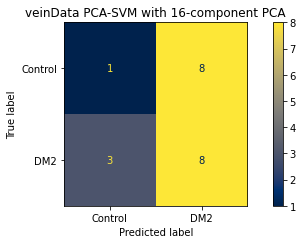

In [40]:
param_grid = {
    'base_estimator__C': np.linspace(1e-15, 1000, 130),
    'base_estimator__kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
    'base_estimator__gamma': ['auto', 'scale'],
    'base_estimator__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200],
    }

grid = GridSearchCV(BaggingClassifier(SVC(probability=True), n_jobs=-1), param_grid, refit=True, verbose=1, cv=RepeatedStratifiedKFold(n_splits=10, random_state=42), scoring='accuracy', n_jobs=-1)
grid.fit(X_pca ,target)

print('Best estimator accuracy according to Grid search (val_accuracy) : ', grid.best_score_)
print('Best estimator parameters according to Grid search : ', grid.best_estimator_.get_params())
print('ROC AUC score : ', roc_auc_score(target, grid.best_estimator_.predict_proba(X_pca)[:, 1]))

print(classification_report(target, grid.best_estimator_.predict(X_pca)))
plot_confusion_matrix(grid.best_estimator_, X_pca, target, display_labels=['Control', 'DM2'], cmap='cividis')
plt.title(f'{file_name} PCA-SVM with {pca.n_components_}-component PCA')
plt.savefig(f'pca_confusion_matrix_{file_name}.pdf')
plt.show()

Fitting 100 folds for each of 150 candidates, totalling 15000 fits
Best estimator accuracy according to Grid search (val_accuracy) :  0.515
Best estimator parameters according to Grid search :  {'base_estimator__C': 0.714295, 'base_estimator__break_ties': False, 'base_estimator__cache_size': 200, 'base_estimator__class_weight': None, 'base_estimator__coef0': 0.0, 'base_estimator__decision_function_shape': 'ovr', 'base_estimator__degree': 3, 'base_estimator__gamma': 'scale', 'base_estimator__kernel': 'linear', 'base_estimator__max_iter': -1, 'base_estimator__probability': True, 'base_estimator__random_state': None, 'base_estimator__shrinking': True, 'base_estimator__tol': 0.001, 'base_estimator__verbose': False, 'base_estimator': SVC(C=0.714295, kernel='linear', probability=True), 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 157, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


/opt/homebrew/Caskroom/miniforge/base/envs/env_tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/env_tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/env_tensorflow/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/env_tensorflow/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 381, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/env_tensorflow/lib/python3.9/site-packag

ROC AUC score :  0.6333333333333333
              precision    recall  f1-score   support

           0       0.50      0.11      0.18         9
           1       0.56      0.91      0.69        11

    accuracy                           0.55        20
   macro avg       0.53      0.51      0.44        20
weighted avg       0.53      0.55      0.46        20



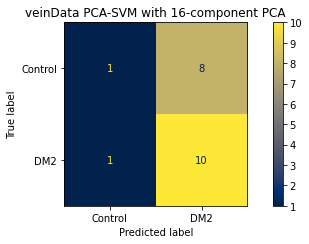

In [63]:
param_grid = {
    'base_estimator__C': np.linspace(1e-5, 10, 15),
    'base_estimator__kernel': ['linear'],
    'n_estimators': np.linspace(10, 200, 10, dtype=int),
    }

grid = GridSearchCV(BaggingClassifier(SVC(probability=True), n_jobs=-1), param_grid, refit=True, verbose=1, cv=RepeatedStratifiedKFold(n_splits=10, random_state=42), scoring='accuracy', n_jobs=-1)
grid.fit(X_pca ,target)

print('Best estimator accuracy according to Grid search (val_accuracy) : ', grid.best_score_)
print('Best estimator parameters according to Grid search : ', grid.best_estimator_.get_params())
grid_roc_score = cross_val_score(grid.best_estimator_, X_pca, target, cv=RepeatedStratifiedKFold(n_splits=10, random_state=42), scoring='roc_auc', n_jobs=-1)
mean_grid_roc_score = np.nanmean(grid_roc_score)
print('ROC AUC score : ', mean_grid_roc_score)

print(classification_report(target, grid.best_estimator_.predict(X_pca)))
plot_confusion_matrix(grid.best_estimator_, X_pca, target, display_labels=['Control', 'DM2'], cmap='cividis')
plt.title(f'{file_name} PCA-SVM with {pca.n_components_}-component PCA')
plt.savefig(f'pca_confusion_matrix_{file_name}.pdf')
plt.show()

In [61]:
np.nanmean(grid_roc_score)
grid_roc_score

array([nan,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0., nan,  0.,  1.,
        1.,  0., nan,  1.,  1.,  1.,  1., nan,  1.,  0.,  1.,  0.,  0.,
        1.,  1.,  0.,  0., nan,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,
        0., nan,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1., nan,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  0.,  1., nan,  1.,  1.,  0.,  1.,
        0.,  1.,  0.,  1.,  0., nan,  0.,  1.,  0.,  1.,  1.,  1.,  1.,
        1.,  0., nan,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1., nan,
        1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.])